In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\HP 830 G7\Documents\Baccumen\Python\EDA Case Study\Data Set - industrial_safety_and_health_database_with_accidents_description.csv")
df

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...,...
420,434,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
421,435,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
422,436,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
423,437,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.7+ KB


In [5]:
# checking for missing values
df.isnull().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [6]:
# checking for duplicates
df.duplicated().sum()

0

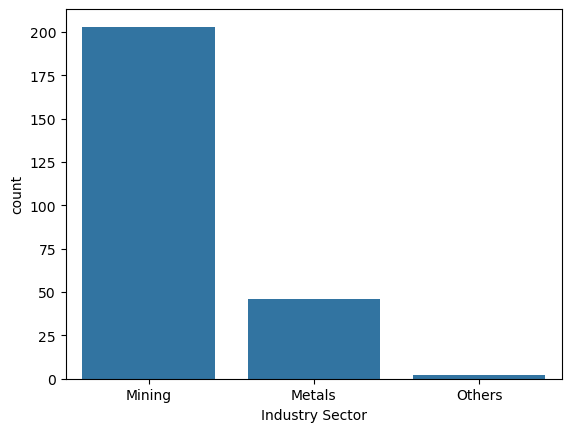

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

country_01_data = df[df['Countries'] == 'Country_01']
sns.countplot(data = country_01_data, x = 'Industry Sector')
plt.show()

In [16]:
import scipy.stats as stats
country_01_data = df[df['Countries']== 'Country_01']
Industry_sector_count = country_01_data['Industry Sector'].value_counts()
Industry_sector_count

Industry Sector
Mining    203
Metals     46
Others      2
Name: count, dtype: int64

In [17]:
chi2, p_value = stats.chisquare(f_obs = Industry_sector_count)
print(f"chi_square statistics: {chi2}, p_value: {p_value}")

chi_square statistics: 266.87649402390434, p_value: 1.1181643658731355e-58


In [21]:

contingency_table = pd.crosstab(df['Genre'], df['Employee or Third Party'])
print(contingency_table)

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}, P-value: {p_value}")


Employee or Third Party  Employee  Third Party  Third Party (Remote)
Genre                                                               
Female                          8            9                     5
Male                          171          180                    52
Chi-Square Statistic: 1.7497418340149604, P-value: 0.4169158329485907


<Axes: xlabel='Employee or Third Party', ylabel='count'>

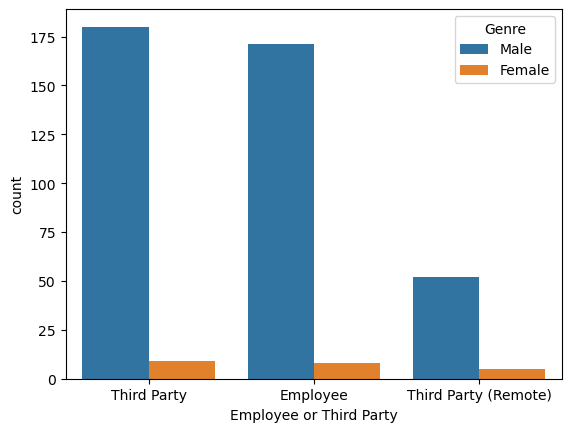

In [24]:
sns.countplot(x = 'Employee or Third Party', data = df, hue = 'Genre')